# 矩阵条件数随 s_1, s_2 变化的 3D Surface

- s1_s2_cond/

In [ ]:
"""
生成数据
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from s1s2_solver import PortfolioOptimizer
from data_provider import generate_portfolio_problem_raw, get_tickers
import matplotlib.patches as mpatches

def get_cond(s1, s2):
    cond = np.linalg.cond(
        PortfolioOptimizer(
            R,
            S,
            P,
            s1,
            s2,
            1,
        ).matrix
    )
    return cond

year = 2012
stock_file = f"./data/Nasdaq-100-{year}.xlsx"
tickers = ['ADSK', 'KLAC']  # 固定了两支股票
print(tickers)
R, S, P = generate_portfolio_problem_raw(
    tickers=tickers,
    stock_file=stock_file
)
original_matrix = PortfolioOptimizer(R, S, P, 1, 1, 1).matrix
original_cond = np.linalg.cond(original_matrix)
print(f"original_cond = {original_cond}")
num = 20
s1_values = np.linspace(0.1, 1, num)  # 参数s1的取值
s2_bound = 1e-3
s2_values = np.linspace(-s2_bound, s2_bound, num)  # 参数s2的取值
# 遍历参数值，并计算对应的指标值
cond_values = []
for s2 in s2_values:
    row = []
    for s1 in s1_values:
        cond = get_cond(s1, s2)
        row.append(cond)
    cond_values.append(row)

cond_values = np.array(cond_values)
# 保存到文件
np.savetxt(f'result/s1_s2_cond/v2_s1.txt', s1_values)
np.savetxt(f'result/s1_s2_cond/v2_s2.txt', s2_values)
np.savetxt(f'result/s1_s2_cond/v2_cond.txt', cond_values)


['ADSK', 'KLAC']
original_cond = 4768.9712146136335


min(cond) = 19.291968468482324


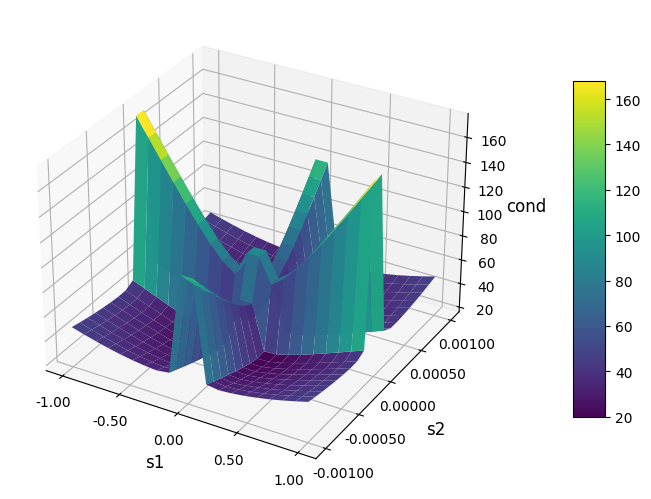

In [1]:
"""
final version
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from s1s2_solver import PortfolioOptimizer
from data_provider import generate_portfolio_problem_raw, get_tickers
import matplotlib.patches as mpatches
import pandas as pd

num = 20
s1_values = np.linspace(-1, 1, num)  # 参数s1的取值
s2_bound = 1e-2
s2_bound = 1e-3
s2_values = np.linspace(-s2_bound, s2_bound, num)  # 参数s2的取值
# 从文件中读取
s1_values = np.loadtxt(f'result/s1_s2_cond/v1_s1.txt')
s2_values = np.loadtxt(f'result/s1_s2_cond/v1_s2.txt')
cond_values = np.loadtxt(f'result/s1_s2_cond/v1_cond.txt')
# 转换数据为网格形式
s1_values, s2_values = np.meshgrid(s1_values, s2_values)
cond_values = np.array(cond_values)
print(f"min(cond) = {np.min(cond_values)}")  # 避免因为格点取的太宽导致 cond 的值不够小

# 创建3D图形对象并设置样式
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('default')
# 创建图形对象和3D坐标系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制曲面图
surf1 = ax.plot_surface(s1_values, s2_values, cond_values, cmap='viridis', alpha=0.99)
# 创建colorbar轴对象
cbar_ax = fig.add_axes([1.0, 0.15, 0.05, 0.7])
# x位置，y位置，宽度和高度
# 添加colorbar
fig.colorbar(surf1, cax=cbar_ax)
# 自定义 x 轴和 y 轴的刻度
ticks_num = 5
xticks = np.linspace(-1, 1, ticks_num)  # 自定义 x 轴刻度
xticklabels = [f'{tick:.2f}' for tick in xticks]  # 自定义 x 轴刻度标签
yticks = np.linspace(-s2_bound, s2_bound, ticks_num)  # 自定义 y 轴刻度
yticklabels = [f'{tick:.5f}' for tick in yticks]  # 自定义 y 轴刻度标签
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
# 设置 x 轴和 y 轴的 ticks 间距
pad = 2  # 间距大小，单位为 points
ax.tick_params(axis='x', which='major', pad=pad)
ax.tick_params(axis='y', which='major', pad=3)

# 自定义 x 轴和 y 轴的标签
labelpad = 10  # 间距大小，单位为 points
xlabel = 's1'  # TODO 改为 latex $s_1$
ylabel = 's2'
zlabel = 'cond'
fontdict = {'fontsize': 12, 'fontfamily': 'sans-serif'}  # TODO 选择字体
ax.set_xlabel(xlabel, fontdict=fontdict)
ax.set_ylabel(ylabel, fontdict=fontdict, labelpad=9)
ax.set_zlabel(zlabel, fontdict=fontdict, labelpad=7)

# 调正 colorbar 的方位
fig.subplots_adjust(left=0.0, bottom=0.0, right=0.99, top=1.0)

# 保存图像为 PDF 格式
output_filename = f"image/s1_s2_cond/v1_surface.pdf"
#plt.savefig(output_filename, dpi=300, bbox_inches='tight')

# 显示图形
plt.show()


min(cond) = 7.398983351388822


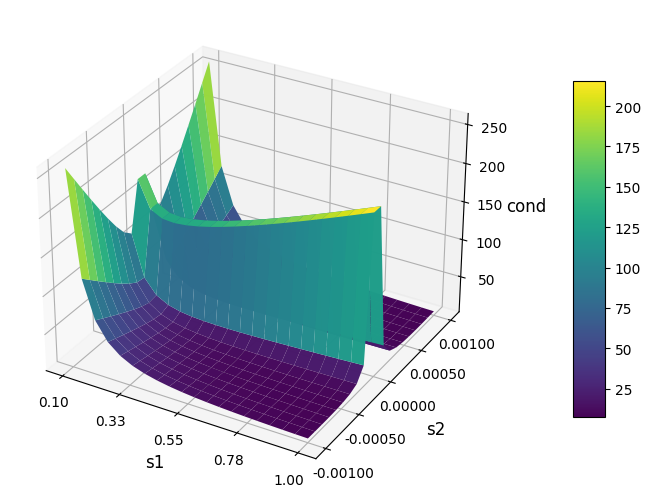

In [2]:
"""
final version
"""

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from s1s2_solver import PortfolioOptimizer
from data_provider import generate_portfolio_problem_raw, get_tickers
import matplotlib.patches as mpatches
import pandas as pd

num = 20
s1_lower_bound = 0.1
s1_upper_bound = 1
s1_values = np.linspace(s1_lower_bound, s1_upper_bound, num)  # 参数s1的取值
s2_bound = 1e-2
s2_bound = 1e-3
s2_values = np.linspace(-s2_bound, s2_bound, num)  # 参数s2的取值
# 从文件中读取
s1_values = np.loadtxt(f'result/s1_s2_cond/v2_s1.txt')
s2_values = np.loadtxt(f'result/s1_s2_cond/v2_s2.txt')
cond_values = np.loadtxt(f'result/s1_s2_cond/v2_cond.txt')
# 转换数据为网格形式
s1_values, s2_values = np.meshgrid(s1_values, s2_values)
cond_values = np.array(cond_values)
print(f"min(cond) = {np.min(cond_values)}")  # 避免因为格点取的太宽导致 cond 的值不够小

# 创建3D图形对象并设置样式
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('default')
# 创建图形对象和3D坐标系
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# 绘制曲面图
surf1 = ax.plot_surface(s1_values, s2_values, cond_values, cmap='viridis', alpha=0.99)
# 创建colorbar轴对象
cbar_ax = fig.add_axes([1.0, 0.15, 0.05, 0.7])
# x位置，y位置，宽度和高度
# 添加colorbar
fig.colorbar(surf1, cax=cbar_ax)
# 自定义 x 轴和 y 轴的刻度
ticks_num = 5
xticks = np.linspace(s1_lower_bound, s1_upper_bound, ticks_num)  # 自定义 x 轴刻度
xticklabels = [f'{tick:.2f}' for tick in xticks]  # 自定义 x 轴刻度标签
yticks = np.linspace(-s2_bound, s2_bound, ticks_num)  # 自定义 y 轴刻度
yticklabels = [f'{tick:.5f}' for tick in yticks]  # 自定义 y 轴刻度标签
ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)
# 设置 x 轴和 y 轴的 ticks 间距
pad = 2  # 间距大小，单位为 points
ax.tick_params(axis='x', which='major', pad=pad)
ax.tick_params(axis='y', which='major', pad=3)

# 自定义 x 轴和 y 轴的标签
labelpad = 10  # 间距大小，单位为 points
xlabel = 's1'  # TODO 改为 latex $s_1$
ylabel = 's2'
zlabel = 'cond'
fontdict = {'fontsize': 12, 'fontfamily': 'sans-serif'}  # TODO 选择字体
ax.set_xlabel(xlabel, fontdict=fontdict)
ax.set_ylabel(ylabel, fontdict=fontdict, labelpad=9)
ax.set_zlabel(zlabel, fontdict=fontdict, labelpad=7)

# 调正 colorbar 的方位
fig.subplots_adjust(left=0.0, bottom=0.0, right=0.99, top=1.0)

# 保存图像为 PDF 格式
output_filename = f"image/s1_s2_cond/v2_surface.pdf"
#plt.savefig(output_filename, dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

